In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.shape

(600, 6)

In [6]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [8]:
fraud1 = fraud

In [9]:
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
fraud2 = pd.get_dummies(fraud)
fraud2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [11]:
fraud2['Taxable']  = np.where(fraud['Taxable.Income'] < 30000, 'Good', 'Bad')
fraud2.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable
0,68833,50047,10,1,0,0,0,1,0,1,Bad
1,33700,134075,18,0,1,1,0,0,0,1,Bad
2,36925,160205,30,1,0,0,1,0,0,1,Bad
3,50190,193264,15,0,1,0,0,1,0,1,Bad
4,81002,27533,28,1,0,0,1,0,1,0,Bad


In [12]:
fraud2['Taxable'].value_counts()

Bad     476
Good    124
Name: Taxable, dtype: int64

In [ ]:
import seaborn as sns
sns.pairplot(fraud2)

(array([476.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

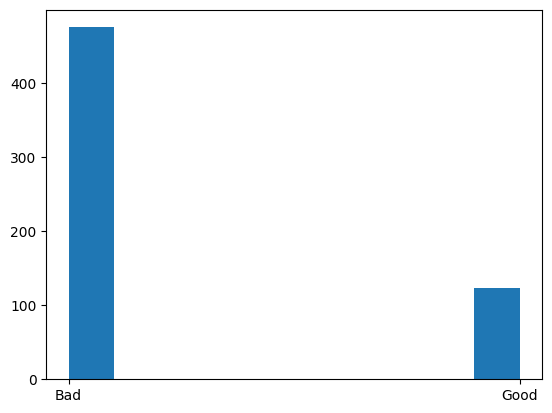

In [50]:
plt.hist(fraud2.Taxable)

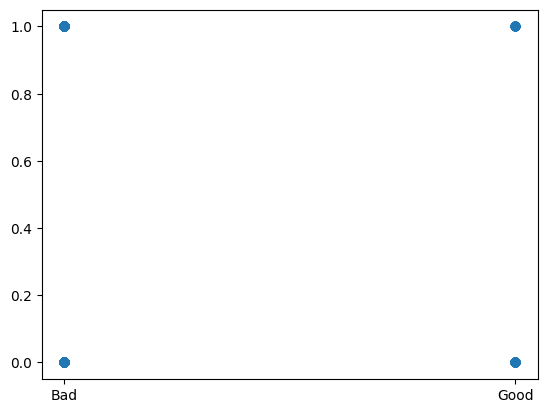

In [58]:
plt.scatter(fraud2['Taxable'],fraud2['Marital.Status_Divorced'])

In [13]:
array = fraud2.values
x = array[ :,1:10 ]
y = array[ :,10 ]

Bagged decission tree

In [14]:
seed = 7
kfold = KFold( n_splits=8, random_state=seed, shuffle = True )
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier( estimator=cart, n_estimators=num_trees, random_state = seed )
results = cross_val_score( model, x, y, cv=kfold )

In [15]:
results

array([0.78666667, 0.72      , 0.82666667, 0.74666667, 0.70666667,
       0.77333333, 0.70666667, 0.73333333])

In [16]:
results.mean()

0.75

Random Forest Classification

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

In [18]:
results

array([0.78333333, 0.73333333, 0.65      , 0.66666667, 0.75      ,
       0.6       , 0.85      , 0.71666667, 0.75      , 0.83333333])

In [19]:
results.mean()

0.7333333333333333

AdaBoost Classification


In [20]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 50
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model =  AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)

In [21]:
results

array([0.76666667, 0.73333333, 0.85      , 0.88333333, 0.75      ,
       0.76666667, 0.81666667, 0.65      , 0.83333333, 0.73333333])

In [22]:
results.mean()

0.7783333333333333

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold =KFold(n_splits =10 )

estimate = [ ]

model1 = LogisticRegression( max_iter=500)
estimate.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimate.append(('cart', model2))

model3 = SVC()
estimate.append(('svm', model3))

# ensemble model
ensemble = VotingClassifier(estimate)
results = cross_val_score(ensemble, x, y, cv=kfold)

In [26]:
results

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [27]:
results.mean()

0.7933333333333332